In [1]:
import os
import IPython.display as ipd
import numpy as np

In [2]:
def getFilesInDirectory(directory):
    files = []
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
            files.append(os.path.abspath(os.path.join(dirpath, f)))
    return files

In [3]:
def getInfo(path):
    head, fileName = os.path.split(path)
    head , curClass = os.path.split(head)
    return os.path.splitext(fileName)[0], curClass

In [4]:
def createDirectory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)


In [5]:
files = getFilesInDirectory('datasetJair')
len(files)

200

In [7]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy

d:\programs\python 3.8\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
d:\programs\python 3.8\lib\site-packages\torchaudio\backend\utils.py:63: UserWarning: The interface of "soundfile" backend is planned to change in 0.8.0 to match that of "sox_io" backend and the current interface will be removed in 0.9.0. To use the new interface, do `torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE = False` before setting the backend to "soundfile". Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [8]:
def getParams(sample_rate):
    n_fft = 400.0
    frame_length = n_fft / sample_rate * 1000.0
    frame_shift = frame_length / 2.0
    params = {
        "channel": 0,
        "dither": 0.0,
        "window_type": "hanning",
        "frame_length": frame_length,
        "frame_shift": frame_shift,
        "remove_dc_offset": False,
        "round_to_power_of_two": False,
        "sample_frequency": sample_rate,
    }
    return params

In [26]:
dirOutput = 'DiegoSpectrogram'

In [9]:
def printImage(spectrogramKaldi, figFile):
    #plt.figure()
    plt.axis('off')
    plt.imshow(spectrogramKaldi.t().numpy(), aspect='auto', cmap = 'magma')
    plt.savefig(figFile, bbox_inches='tight')

In [10]:
def deleteSilence(waveform, sample_rate):
    waveform = torchaudio.functional.vad(waveform, sample_rate = sample_rate, trigger_level = 1.0)
    waveform = torch.flip(waveform, [1])
    waveform = torchaudio.functional.vad(waveform, sample_rate = sample_rate, trigger_level = 1.0)
    waveform = torch.flip(waveform, [1])
    return waveform

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [08:57<00:00,  2.69s/it]


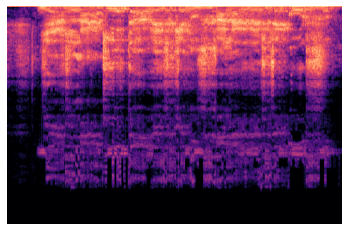

In [29]:
from tqdm import tqdm
emotions = []
for i in tqdm(range(len(files))):
    curFile = files[i]
    fileName, emotion = getInfo(curFile)

    emotions.append(emotion)
   
    curDir = dirOutput + "/" + emotion
    figFile = curDir + "/"  + fileName + ".png"
    
    if os.path.exists(figFile):
        continue
    waveform, sample_rate = torchaudio.load(curFile)
    waveform = deleteSilence(waveform, sample_rate)
    
    spectrogramKaldi = torchaudio.compliance.kaldi.spectrogram(waveform, getParams(sample_rate))
 
    createDirectory(curDir)
    printImage(spectrogramKaldi, figFile)
    
    

In [30]:
from collections import Counter

counter = Counter(emotions)
total = sum(counter.values())
print("Emotions of classic (" , total  , ")")
for k, v in counter.most_common():
    print("{:<15}".format(k) , " " , "{:<15}".format(v), "{:<15}".format("{:4.2f}".format(100 * v / total)+ " %"))

Emotions of classic ( 200 )
feliz             50              25.00 %        
molesto           50              25.00 %        
neutral           50              25.00 %        
triste            50              25.00 %        


In [11]:
waveform, sample_rate = torchaudio.load(files[100])

In [12]:
ipd.Audio(waveform,rate=sample_rate)

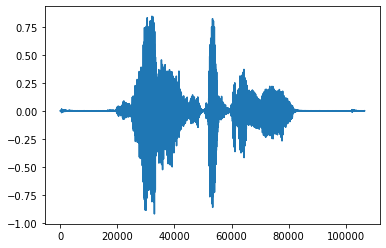

In [13]:
plt.figure()
plt.plot(waveform.t().numpy())

In [14]:
waveform = deleteSilence(waveform, sample_rate)

d:\programs\python 3.8\lib\site-packages\torchaudio\functional.py:2076: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  ..\aten\src\ATen\native\SpectralOps.cpp:590.)
  _dftBuf = torch.rfft(dftBuf, 1)


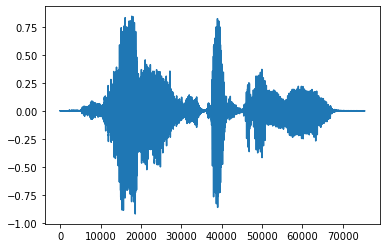

In [15]:
plt.figure()
plt.plot(waveform.t().numpy())

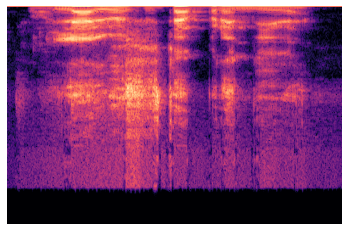

In [16]:
spectrogramKaldi = torchaudio.compliance.kaldi.spectrogram(waveform, getParams(sample_rate))
plt.axis('off')
plt.imshow(spectrogramKaldi.t().numpy(), aspect='auto', cmap = 'magma')
plt.show()